In [251]:
# imports
%matplotlib inline
from sklearn.datasets import load_boston
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [252]:
(data,target) = load_boston(return_X_y=True)

ones = np.ones((506,14))
print(ones.shape)
for i in range(0,506):
    for j in range(0,13):
        ones[i,j] = data[i,j]
data = ones
print(data)

(506L, 14L)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 1.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.0000e+00]]


In [253]:
# split into train and test
# initial testing and train without cross validation
training_data = data[0:400]
training_labels = target[0:400]
testing_data = data[400:507]
testing_labels = target[400:507]

print(testing_data.shape)
print(testing_labels.shape)

(106L, 14L)
(106L,)


In [254]:
#print(data.T)
def LSRegression(new_data,training_labels):
    multi = np.matmul(new_data.T,new_data)
    multi_inv = inv(multi)
    multi_2 = np.matmul(multi_inv,new_data.T)
    final = np.matmul(multi_2,training_labels)
    y_hat = np.matmul(new_data,final)
    #print(y_hat.shape)
    #print(y_hat)
    return(y_hat)
def LSRegression_w(new_data,training_labels):
    multi = np.matmul(new_data.T,new_data)
    multi_inv = inv(multi)
    multi_2 = np.matmul(multi_inv,new_data.T)
    w_hat = np.matmul(multi_2,training_labels)
    #print("what shape",w_hat.shape)
    return(w_hat)

    
    

In [255]:
def LSError(actual,predicted):
    error = np.linalg.norm(actual-predicted,2)**2
    return error


In [256]:
print(LSError(testing_labels,np.matmul(testing_data,LSRegression_w(training_data,training_labels))))

4045.419896184194


('Average error is', 37.17394602167429)


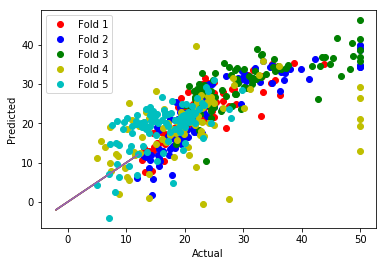

In [261]:
# CROSS VALIDATION SPLIT
import random
# create a split
split_labels = np.array_split(target,5)
#print(split_labels[1].shape)
color = ['ro','bo','go','yo','co']
legend = ["Fold 1","Fold 2","Fold 3","Fold 4", "Fold 5"]
split = np.array_split(data, 5)
sum_error = 0
# take one as test and the rest take as training
for i in range(5):
    
    training_data_cv = []
    test_data_cv = split[i]
    training_labels_cv = []
    test_labels_cv = split_labels[i]
    
    for j in range(5):
        if j!=i:
            training_data_cv.extend(split[j].tolist())
            training_labels_cv.extend(split_labels[j].tolist())
    training_data_cv = np.asarray(training_data_cv)
    training_labels_cv = np.asarray(training_labels_cv)
    #print(training_labels_cv.shape)
    # now that we have train and test data we have to call our LS Error from this
    
    #####
    #print("LS error using w hat ", LSError(test_labels_cv,np.matmul(test_data_cv,LSRegression_w(training_data_cv,training_labels_cv))))

    #print("LS error ", LSError(training_labels_cv,LSRegression(training_data_cv,training_labels_cv)))
    sum_error = sum_error + LSError(test_labels_cv,np.matmul(test_data_cv,LSRegression_w(training_data_cv,training_labels_cv)))

    plt.plot(test_labels_cv,np.matmul(test_data_cv,LSRegression_w(training_data_cv,training_labels_cv)),color[i],label = legend[i])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    #Line with slope=1
    x = np.linspace(-2,12,100)
    y = x
    plt.legend()
    plt.plot(x,y)

print("Average error is", sum_error/506)

In [258]:
# RIDGE REGRESSION
def RR_special_case(training_data,training_labels,reg):
    rdg = LSRegression(training_data,training_labels)/(1+reg)
    return rdg

def RError(actual,predicted):
    error = np.linalg.norm(actual-predicted,2)**2
    return error

#Calculate w for training set- Ridge Regression
def RR(trainData,trainLabels,regParam):
    ridgeA = np.linalg.inv(np.matmul(trainData.T,trainData))
    identity = np.identity(len(ridgeA))
    ridge = np.matmul(np.matmul(np.linalg.inv(np.matmul(trainData.T,trainData) + (regParam*identity)),trainData.T),trainLabels)
    #print(ridge.shape)
    return ridge

#Calculate w for training set- Ridge Regression





In [260]:
# CROSS VALIDATION SPLIT
import random
# create a split
split_labels = np.array_split(target,5)
#print(split_labels[1].shape)

split = np.array_split(data, 5)
sum_error = 0
# take one as test and the rest take as training
for i in range(5):
    training_data_cv = []
    test_data_cv = split[i]
    training_labels_cv = []
    test_labels_cv = split_labels[i]
    
    for j in range(5):
        if j!=i:
            training_data_cv.extend(split[j].tolist())
            training_labels_cv.extend(split_labels[j].tolist())
    training_data_cv = np.asarray(training_data_cv)
    training_labels_cv = np.asarray(training_labels_cv)
    #print(training_labels_cv.shape)
    # now that we have train and test data we have to call our LS Error from this
    
    #print("RR error using w hat ", RError(test_labels_cv,np.matmul(test_data_cv,RR(training_data_cv,training_labels_cv,1))))

    #print("LS error ", RError(training_labels_cv,RR(training_data_cv,training_labels_cv,1)))
    sum_error = sum_error + RError(test_labels_cv,np.matmul(test_data_cv,RR(training_data_cv,training_labels_cv,1)))


print("Average error is", sum_error/506)

('Average error is', 33.74219618483561)
